In [1]:
import numpy as np
import scanpy as sc
import scycle as cc
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 70

import os

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)
plt.style.use('dark_background')

In [2]:
# We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad').T
adata.obs_names_make_unique()
adata.var_names_make_unique()
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 4800 × 13287

In [3]:
cc.pp.prep_pooling(adata, max_counts=50000, max_mt_ratio=10)

Preparing embedding...
3862 samples pass the count filter
4159  samples pass the mt filter
Samples selected 3460
Embedding for pooling...
Pooling 3460 samples...


In [4]:
cc.tl.dimensionality_reduction(adata, method="ica")

-- Dimensionality reduction using ICA...


In [5]:
cc.tl.enrich_components(adata)

In [6]:
adata.uns['scycle']

{'preprocess': {'method': 'pooling',
  'n_neighbors': 5,
  'min_counts': 10000,
  'n_top_genes': 10000,
  'embed_n_comps': 20},
 'dimRed': {'method': 'ica',
  'features': array(['MALAT1', 'MT-CO2', 'MT-CO1', ..., 'AC092747.4', 'AL355001.2',
         'PCGF5'], dtype=object),
  'n_comps': 30,
  'seed': None},
 'enrich_components': {'G1/S': 1, 'G2/M+': 14, 'G2/M-': 16, 'Histone': 3}}

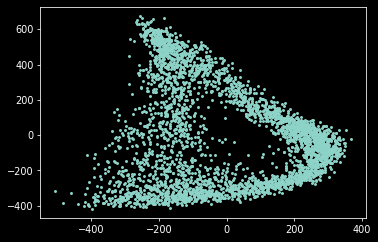

In [7]:
X = adata.obsm['X_dimRed']
idx_g1s = adata.uns['scycle']['enrich_components']['G1/S']
idx_g2m = adata.uns['scycle']['enrich_components']['G2/M+']
plt.scatter(X[:,idx_g1s], X[:,idx_g2m], s=4)